<p><img alt="Colaboratory logo" height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

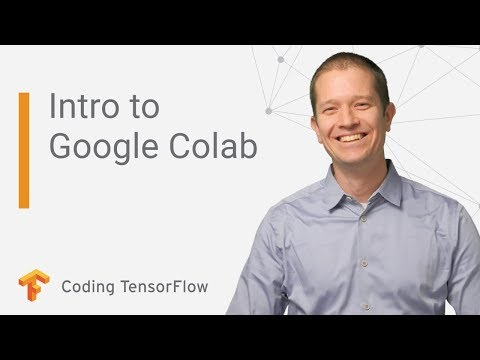

In [0]:
#@title Introducing Colaboratory
#@markdown This 3-minute video gives an overview of the key features of Colaboratory:
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI', width=600, height=400)

## Getting Started

The document you are reading is a  [Jupyter notebook](https://jupyter.org/), hosted in Colaboratory. It is not a static page, but an interactive environment that lets you write and execute code in Python and other languages.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [0]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the ▷ button to the left of the code, or use the keyboard shortcut "⌘/Ctrl+Enter".

All cells modify the same global state, so variables that you define by executing a cell can be used in other cells:

In [0]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

For more information about working with Colaboratory notebooks, see [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb).


## More Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

## Machine Learning Examples: Seedbank

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out the [Seedbank](https://research.google.com/seedbank/) project.

A few featured examples:

- [Neural Style Transfer](https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras): Use deep learning to transfer style between images.
- [EZ NSynth](https://research.google.com/seedbank/seed/ez_nsynth): Synthesize audio with WaveNet auto-encoders.
- [Fashion MNIST with Keras and TPUs](https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus): Classify fashion-related images with deep learning.
- [DeepDream](https://research.google.com/seedbank/seed/deepdream): Produce DeepDream images from your own photos.
- [Convolutional VAE](https://research.google.com/seedbank/seed/convolutional_vae): Create a generative model of handwritten digits.

In [0]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

In [0]:
data_source = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"  
tweets = pd.read_csv(data_source) 

In [0]:
tweets.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [0]:
print (tweets.columns)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [0]:
print (tweets.shape)

(14640, 15)


In [0]:
print (tweets.describe())

           tweet_id  ...  retweet_count
count  1.464000e+04  ...   14640.000000
mean   5.692184e+17  ...       0.082650
std    7.791112e+14  ...       0.745778
min    5.675883e+17  ...       0.000000
25%    5.685592e+17  ...       0.000000
50%    5.694779e+17  ...       0.000000
75%    5.698905e+17  ...       0.000000
max    5.703106e+17  ...      44.000000

[8 rows x 4 columns]


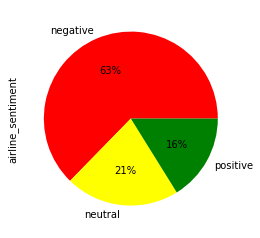

In [0]:
tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

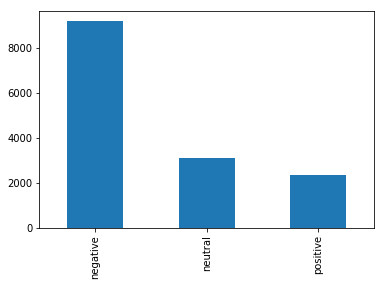

In [0]:
tweets.airline_sentiment.value_counts().plot(kind='bar')

In [0]:
#Data Cleaning
features=tweets.iloc[:,10].values
labels=tweets.iloc[:,1].values

print(features)
print(labels)


['@VirginAmerica What @dhepburn said.'
 "@VirginAmerica plus you've added commercials to the experience... tacky."
 "@VirginAmerica I didn't today... Must mean I need to take another trip!"
 ... '@AmericanAir Please bring American Airlines to #BlackBerry10'
 "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
 '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?']
['neutral' 'positive' 'neutral' ... 'neutral' 'negative' 'neutral']


In [0]:

processed_features = []

for sentence in range(0, len(features)):  
  
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    
    

  
    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    #processed_feature = re.sub(r'^b\s+', '', processed_feature)

  
    
    processed_feature = re.sub(r"i'm", "i am", processed_feature)
    processed_feature = re.sub(r"\'s", "is", processed_feature)
    #processed_feature = re.sub(r"she's", "she is", processed_feature)
    #processed_feature = re.sub(r"that's", "that is", processed_feature)
    #processed_feature = re.sub(r"what's", "what is", processed_feature)
    #processed_feature = re.sub(r"where's", "where is", processed_feature)
    #processed_feature = re.sub(r"how's", "how is", processed_feature)
    processed_feature = re.sub(r"\'ll", " will", processed_feature)
    processed_feature = re.sub(r"\'ve", " have", processed_feature)
    processed_feature = re.sub(r"\'re", " are", processed_feature)
    processed_feature = re.sub(r"\'d", " would", processed_feature)
    processed_feature = re.sub(r"n't", " not", processed_feature)
    processed_feature = re.sub(r"won't", "will not", processed_feature)
    processed_feature = re.sub(r"can't", "cannot", processed_feature)
    
    
    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    
    #Stemming Words
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()
    processed_feature=(' '.join([stemmer.stem(word) for word in processed_feature.split()]))
    #print (processed_feature)
    
    
    #Lemmatization
    
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    processed_feature=(' '.join([lemmatizer.lemmatize(word) for word in processed_feature.split()]))
    
    #stop_words = set(stopwords.words('english'))
    #processed_feature = (' '.join([word for word in processed_feature.split() if not word in stop_words]))

    # Converting to Lowercase
    processed_feature = processed_feature.lower()
    
    processed_features.append(processed_feature)
    
print (processed_features)


['virginamerica what dhepburn said', 'virginamerica plu you ve ad commerci to the experi tacki', 'virginamerica didn today must mean need to take anoth trip', 'virginamerica it realli aggress to blast obnoxi entertain in your guest face amp they have littl recours', 'virginamerica and it a realli big bad thing about it', 'virginamerica serious would pay 30 flight for seat that didn have thi play it realli the onli bad thing about fli va', 'virginamerica ye nearli everi time fli vx thi ear worm won go away', 'virginamerica realli miss prime opportun for men without hat parodi there http co mwpg7grezp', 'virginamerica well didn but now do d', 'virginamerica it wa amaz and arriv an hour earli you re too good to me', 'virginamerica did you know that suicid is the second lead caus of death among teen 10 24', 'virginamerica lt 3 pretti graphic so much better than minim iconographi d', 'virginamerica thi is such great deal alreadi think about my 2nd trip to australia amp haven even gone on my

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords 
stop_words = ['in', 'of', 'at', 'a', 'the','an','or','i','and','has','he','will','was','with','is','its','if']#Can ADD More
#stop_words = set(stopwords.words('english'))
cv = CountVectorizer(binary=True,ngram_range=(1,2),stop_words=stop_words)
cv.fit(processed_features)
processed_features = cv.transform(processed_features)

#print (processed_features)


In [0]:


!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [0]:
from sklearn.ensemble import RandomForestClassifier


text_classifier_RF = RandomForestClassifier(n_estimators=200, random_state=0)  
text_classifier_RF.fit(X_train, y_train)  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
#print (type(X_test))
#print (X_test)

print ("Random Forest Classifier")
predictions = text_classifier_RF.predict(X_test)  
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(predictions,y_test))
print(classification_report(predictions,y_test))

Random Forest Classifier
0.7557377049180328
              precision    recall  f1-score   support

    negative       0.96      0.76      0.85      2947
     neutral       0.38      0.66      0.48       440
    positive       0.42      0.87      0.57       273

    accuracy                           0.76      3660
   macro avg       0.59      0.76      0.63      3660
weighted avg       0.85      0.76      0.78      3660



In [0]:
from sklearn.svm import LinearSVC

text_classifier_SVC= LinearSVC(C=0.01)
text_classifier_SVC.fit(X_train,y_train)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
#print (type(X_test))
#print (X_test)
print ("Linear Support Vector Classifier")
predictions = text_classifier_SVC.predict(X_test) 
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(predictions,y_test))
print(classification_report(predictions,y_test))

Linear Support Vector Classifier
0.8049863387978142
              precision    recall  f1-score   support

    negative       0.93      0.84      0.88      2067
     neutral       0.57      0.68      0.62       513
    positive       0.62      0.79      0.69       348

    accuracy                           0.80      2928
   macro avg       0.70      0.77      0.73      2928
weighted avg       0.83      0.80      0.81      2928



In [0]:
from sklearn.svm import SVC

text_classifier_SVM= SVC()
text_classifier_SVM.fit(X_train,y_train)
#print (type(X_test))
#print (X_test)
print ("Support Vector Machine")
predictions = text_classifier_SVM.predict(X_test) 
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(predictions,y_test))
print(classification_report(predictions,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Machine
0.6386612021857924
              precision    recall  f1-score   support

    negative       1.00      0.64      0.78      2928
     neutral       0.00      0.00      0.00         0
    positive       0.00      0.00      0.00         0

    accuracy                           0.64      2928
   macro avg       0.33      0.21      0.26      2928
weighted avg       1.00      0.64      0.78      2928



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
from sklearn.naive_bayes import GaussianNB 
text_classifier_NB = GaussianNB() 
text_classifier_NB.fit(X_train.toarray(), y_train) 
  

In [0]:
#print (type(X_test))
#print (X_test)
print ("Naive Bayes Algorithm")
predictions = text_classifier_NB.predict(X_test.toarray()) 
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(predictions,y_test))
print(classification_report(predictions,y_test))

In [0]:
from sklearn.linear_model import LogisticRegression
  
text_classifier_LR= LogisticRegression(C=0.5)
text_classifier_LR.fit(X_train,y_train)
#text_classifier_LR.fit(processed_features,labels)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#print (type(X_test))
#print (X_test)
print ("Logist Regression Algorithm")
predictions = text_classifier_LR.predict(X_test.toarray()) 
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(predictions,y_test))
print(classification_report(predictions,y_test))

Logist Regression Algorithm
0.8080601092896175
              precision    recall  f1-score   support

    negative       0.91      0.86      0.88      1984
     neutral       0.60      0.66      0.63       556
    positive       0.66      0.76      0.71       388

    accuracy                           0.81      2928
   macro avg       0.73      0.76      0.74      2928
weighted avg       0.82      0.81      0.81      2928



In [0]:

sentence="hi i am looking for a report that will tell me the average day to close for office 365 by geo segment smc c and smc smb . would you please provide a link to that report? ive reviewed ocp insight where i believe i found this information previously and cannot locate it.";
vector_array = []
  
# Remove all the special characters
clean_input = re.sub(r'\W', ' ', str(sentence))




# Remove single characters from the start
clean_input = re.sub(r'\^[a-zA-Z]\s+', ' ', clean_input) 

# Substituting multiple spaces with single space
clean_input = re.sub(r'\s+', ' ', clean_input, flags=re.I)

# Removing prefixed 'b'
#processed_feature = re.sub(r'^b\s+', '', processed_feature)

# Converting to Lowercase
clean_input = clean_input.lower()

clean_input = re.sub(r"i'm", "i am", clean_input)
clean_input = re.sub(r"\'s", "is", clean_input)
#clean_input = re.sub(r"she's", "she is", clean_input)
#clean_input = re.sub(r"that's", "that is", clean_input)
#clean_input = re.sub(r"what's", "what is", clean_input)
#clean_input = re.sub(r"where's", "where is", clean_input)
#clean_input = re.sub(r"how's", "how is", clean_input)
clean_input = re.sub(r"\'ll", " will", clean_input)
clean_input = re.sub(r"\'ve", " have", clean_input)
clean_input = re.sub(r"\'re", " are", clean_input)
clean_input = re.sub(r"\'d", " would", clean_input)
clean_input = re.sub(r"n't", " not", clean_input)
clean_input = re.sub(r"won't", "will not", clean_input)
clean_input = re.sub(r"can't", "cannot", clean_input)

  # remove all single characters
clean_input= re.sub(r'\s+[a-zA-Z]\s+', ' ', clean_input)

vector_array.append(clean_input)
predict=cv.transform(vector_array)
print (predict)





  (0, 8868)	1
  (0, 18772)	1
  (0, 19824)	1
  (0, 22098)	1
  (0, 26896)	1
  (0, 27078)	1
  (0, 38013)	1
  (0, 39215)	1
  (0, 45822)	1
  (0, 45828)	1
  (0, 48929)	1
  (0, 49761)	1
  (0, 50513)	1
  (0, 54973)	1
  (0, 55016)	1
  (0, 57721)	1
  (0, 75690)	1
  (0, 79000)	1
  (0, 86749)	1
  (0, 86772)	1
  (0, 87410)	1
  (0, 87894)	1
  (0, 90837)	1
  (0, 91150)	1
  (0, 92237)	1
  (0, 102861)	1
  (0, 104587)	1
  (0, 104707)	1
  (0, 105572)	1


In [0]:
text_classifier_LR.predict(predict)


array(['negative'], dtype=object)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True